In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import entropy
import scipy.stats

In [2]:
train = np.loadtxt('data/pa2train.txt')
test = np.loadtxt('data/pa2test.txt')
valid = np.loadtxt('data/pa2validation.txt')
features = np.loadtxt('data/pa2features.txt',dtype = 'object')

In [3]:
Xtrain = train
ytrain = train[:,-1]

Xtest = test
ytest = test[:,-1]

Xvalid = valid
yvalid = valid[:,-1]

#### 1. First, build an ID3 Decision Tree classifier based on the data in pa2train.txt. Do not use pruning. Draw the first three levels decision tree that you obtain. For each node that you draw, if it is a leaf node, write down the label that will be predicted for this node, as well as how many of the training data points lie in this node. If it is an internal node, write down the splitting rule for the node, as well as how many of the training data points lie in this node. (Hint: If your code is correct, the root node will involve the rule Feature 5 < 0.5.)

In [4]:
class Node:
    def __init__(self):
        self.data = Node
        self.yesBranch = None
        self.noBranch = None
        self.label = None
        self.decision = None
        self.indices = None
        self.isLeaf = None
        self.isPure = None
        self.numPoints = None
        self.feature = None
        self.thresh = None

In [5]:
#entropy calculation helper function
def calcEntropy(data):
    N = len(data)
    #get num of yes/no labels
    yes_cnt = np.sum(data[:,-1]==1)
    no_cnt = np.sum(data[:,-1] ==0)
    if yes_cnt ==0 or no_cnt ==0:
        return 0    
    return ((yes_cnt/N)*np.log(yes_cnt/N)+ (no_cnt/N)*np.log(no_cnt/N)) *-1

In [6]:
#helper function
#check is a node is pure
def isPure(node):
    if len(np.unique(node.data[:,-1])) !=1:
        return False
    else:
        return True

In [7]:
#builds tree given training data
def ID3DecisionTree(data):
    queue = []
    rootNode = Node()
    rootNode.data = data
    queue.append(rootNode) 
    #while queue is not empty
    while len(queue) >0:
        node = queue.pop(0)
        #only add node to queue if impure
        if isPure(node):
            # if pure set label
            node.label= node.data[0][-1]
        else:
            node1,node2 = splitRule(node)
            queue.append(node1)
            queue.append(node2)
        
    return rootNode

In [8]:
# determines best feature/threshold to split node at
def splitRule(node):
    data = node.data
    N = len(data)
    minEntropy = np.inf
    #for each feature
    for i in range(len(features)):
        #sort data by i'th column/feature
        sorted_data = data[data[:,i].argsort()]
        #for each feature vector
        for x in range(len(sorted_data)-1):
            #skip equivalent values
            if sorted_data[x][i] == sorted_data[x+1][i]:
                continue
            #compute midpoint between adjacent sorted values within ith feature
            threshold = (sorted_data[x][i] + sorted_data[x+1][i])/2
            ent = (((x+1)/N))*calcEntropy(sorted_data[:x+1]) + (1-((x+1)/N))*calcEntropy(sorted_data[x+1:])      
            if ent < minEntropy:
                minEntropy = ent
                bestFeature = i
                bestThresh = threshold
                best_x_i = x
    
    node.feature = bestFeature
    node.thresh = bestThresh
    print("split at x[" +str(bestFeature)+ "] <= " +str(bestThresh))
    node.yesBranch = Node()
    node.noBranch = Node()
    sorted_d = data[data[:,bestFeature].argsort()]
    node.yesBranch.data = sorted_d[:best_x_i+1]
    print("num points in yes branch ",len(node.yesBranch.data))
    node.noBranch.data = sorted_d[best_x_i+1:]
    print("num points in no branch ",len(node.noBranch.data))
    print("next node \u2193 \n")
    return node.yesBranch, node.noBranch

In [9]:
#traverse tree at a node to get label of a feature vector
def getLabel(node, datapoint):
    #keep traversing until node has label
    while node.label is None:
        #feature vector at i'th feature is less than threshold
        x_f_i = datapoint[node.feature]    
        #visit left yes branch if datapoint at feature is less than threshold
        #else visit no branch
        if x_f_i < node.thresh:
            node = node.yesBranch
        else: 
            node = node.noBranch
    
    return node.label

In [10]:
# while impure:
# if np.sum(ytrain[node1.indices] == 0) == 0:
#         node1.label = 1
#         node1.isPure = True
#     elif np.sum(ytrain[node1.indices] == 1) == 0:
#         node1.label = 0
#         node1.isPure = True       

In [11]:
#helper function for pruning, computes mode
def mode(data):
    N = len(data)
    data = np.array(data)
    #compute mode of labels
    label_mode = scipy.stats.mode(data[:,-1])
    label = label_mode[0][0]
    #computes error of most common label
    err = 1 - (scipy.stats.mode(data[:,-1])[1][0] / N)
    return int(label), err

In [12]:
#a bit confusing to interpret based on these print statements
tree = ID3DecisionTree(train)

split at x[4] <= 0.5
num points in yes branch  1319
num points in no branch  681
next node ↓ 

split at x[0] <= 415000.0
num points in yes branch  1284
num points in no branch  35
next node ↓ 

split at x[4] <= 1.5
num points in yes branch  292
num points in no branch  389
next node ↓ 

split at x[16] <= 2506.5
num points in yes branch  704
num points in no branch  580
next node ↓ 

split at x[20] <= 208.0
num points in yes branch  4
num points in no branch  31
next node ↓ 

split at x[19] <= 584.5
num points in yes branch  134
num points in no branch  158
next node ↓ 

split at x[20] <= 2006.0
num points in yes branch  232
num points in no branch  157
next node ↓ 

split at x[0] <= 75000.0
num points in yes branch  393
num points in no branch  311
next node ↓ 

split at x[0] <= 25000.0
num points in yes branch  9
num points in no branch  571
next node ↓ 

split at x[16] <= 2174.0
num points in yes branch  9
num points in no branch  22
next node ↓ 

split at x[11] <= 231.5
num points i

split at x[19] <= 1728.0
num points in yes branch  106
num points in no branch  22
next node ↓ 

split at x[2] <= 0.5
num points in yes branch  1
num points in no branch  6
next node ↓ 

split at x[21] <= 10234.5
num points in yes branch  24
num points in no branch  16
next node ↓ 

split at x[16] <= 3153.5
num points in yes branch  18
num points in no branch  77
next node ↓ 

split at x[10] <= 1809.5
num points in yes branch  22
num points in no branch  326
next node ↓ 

split at x[0] <= 165000.0
num points in yes branch  1
num points in no branch  4
next node ↓ 

split at x[3] <= 1.5
num points in yes branch  3
num points in no branch  1
next node ↓ 

split at x[15] <= 194572.5
num points in yes branch  28
num points in no branch  1
next node ↓ 

split at x[8] <= 1.0
num points in yes branch  4
num points in no branch  2
next node ↓ 

split at x[0] <= 250000.0
num points in yes branch  8
num points in no branch  1
next node ↓ 

split at x[20] <= 890.5
num points in yes branch  4
num 

In [13]:
from graphviz import Digraph

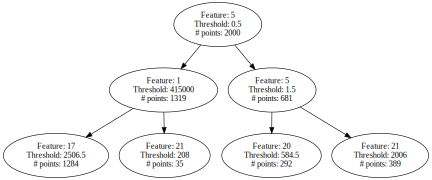

In [14]:
dot = Digraph()
dot.attr(size='6,6')
dot.node('1','Feature: 5 \n Threshold: 0.5 \n # points: 2000', **{'width':'0.5', 'height':'0.5'})
dot.node('2','Feature: 1 \n Threshold: 415000 \n # points: 1319', **{'width':'0.5', 'height':'0.5'})
dot.node('3','Feature: 5 \n Threshold: 1.5 \n # points: 681', **{'width':'0.5', 'height':'0.5'})
dot.node('4','Feature: 17 \n Threshold: 2506.5 \n # points: 1284', **{'width':'0.5', 'height':'0.5'})
dot.node('5','Feature: 21 \n Threshold: 208 \n # points: 35', **{'width':'0.5', 'height':'0.5'})
dot.node('6','Feature: 20 \n Threshold: 584.5 \n # points: 292',**{'width':'0.5', 'height':'0.5'})
dot.node('7','Feature: 21 \n Threshold: 2006 \n # points: 389', **{'width':'0.5', 'height':'0.5'})

dot.edges(['12'])
dot.edges(['13'])
dot.edges(['24'])
dot.edges(['25'])
dot.edges(['36'])
dot.edges(['37'])

dot

#### 2. What is the training and test error of your classifier in part (1), where test error is measured on the data in pa2test.txt?

In [15]:
#get number of incorrectly predicted labels
def calcError(tree, data):
    correct = 0
    N = len(data)
    #loop through node data, each feature vector
    for xi in data:
        #gets predicted label
        label_xi = getLabel(tree, xi)
        #gets true label
        true_label = xi[-1]
        if true_label == label_xi:
            correct+=1
    #proportion of correct labels
    p = correct/N
    return 1 - p

In [16]:
train_error = calcError(tree, train)
print("training error of id3 decision tree classifier: ", train_error)

training error of id3 decision tree classifier:  0.0


In [17]:
test_error = calcError(tree, test)
print("test error of id3 decision tree classifier: ", test_error)

test error of id3 decision tree classifier:  0.17300000000000004


### Observe the training error of 0 above, and the test error of .173 above also

#### 3. Now, prune the decision tree developed in part (1) using the data in pa2validation.txt. While selecting nodes to prune, select them in Breadth-First order, going from left to right (aka, from the Yes branches to the No branches). Write down the validation and test error after 1 and 2 rounds of pruning (that is, after you have pruned 1 and 2 nodes from the tree.)

In [18]:
#Prune using validation v
def prune(tree, valid):
    queue = []
    queue.append([tree, valid])
    #for each node in the tree built by training set
    while len(queue)>0:
        node,valid_data = queue.pop(0)
        #if error of predicting majority label > error of predicting lable
        #replace subtree
        if mode(valid_data)[1] < calcError(node, valid_data):
            node.label = mode(valid_data)[0]
            node.decision = None
            node.thresh = None
            node.feature = None
            break
        #if node does not have label do pruning process again
        if node.label is None:
            yesSplit = valid_data[valid_data[:,node.feature]<=node.thresh]
            queue.append([node.yesBranch, yesSplit])
            noSplit = valid_data[valid_data[:,node.feature]>node.thresh]
            queue.append([node.noBranch, noSplit])

### round 1 pruning

In [19]:
prune(tree, valid)
valid_error = calcError(tree, valid)
print("validation error after one round of pruning: ", valid_error)
test_error = calcError(tree, test)
print("test error after one round of pruning: ", test_error)


validation error after one round of pruning:  0.122
test error after one round of pruning:  0.11699999999999999


### round 2 pruning

In [20]:
prune(tree, valid)
valid_error = calcError(tree, valid)
print("validation error after second round of pruning: ", valid_error)
test_error = calcError(tree, test)
print("test error after second round of pruning: ", test_error)


validation error after second round of pruning:  0.10699999999999998
test error after second round of pruning:  0.10299999999999998


#### 4. Download the file pa2features.txt from the class website. This file provides a description in order of each of the features – that is, it tells you what each coordinate means. Based on the feature descriptions, what do you think is the most salient or prominent feature that predicts credit card default? (Hint: More salient features should occur higher up in the ID3 Decision tree.)

### Feature 5, corresponding to 'PAYMENT_DELAY_SEPTEMBER' is the most salient based on it occuring higher up in the decision tree as well as being the feature for the split at the root node.

In [21]:
features[4]

'PAYMENT_DELAY_SEPTEMBER'